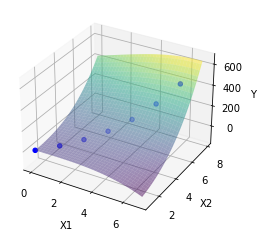

In [4]:
#Ekstra örnek

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#veri setimizi oluşturalım
x1 = np.array([0, 1, 2, 3, 4, 5, 6])
x2 = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([2, 12, 40, 90, 172, 292, 454])

# Veri setimizi 3. dereceden polinomlara dönüştürelim
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(np.column_stack((x1, x2)))

#regresyon modelimizi oluşturalım
model = LinearRegression()
model.fit(x_poly, y)

# Tahminleri görselleştirelim
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x1_pred, x2_pred = np.meshgrid(np.arange(0, 7, 0.1), np.arange(1, 8, 0.1))
y_pred = model.predict(poly.fit_transform(np.column_stack((x1_pred.ravel(), x2_pred.ravel()))))
y_pred = y_pred.reshape(x1_pred.shape)

ax.scatter(x1, x2, y, c='blue')
ax.plot_surface(x1_pred, x2_pred, y_pred, cmap='viridis', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()


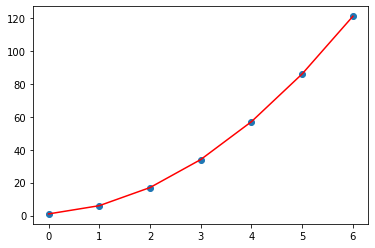

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#x=bağımsız degisken, y=bağimli değişken
x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([1, 6, 17, 34, 57, 86, 121])

#2.dereceden polinom oluşturur.
#x_poly dizisiPolynomialFeatures nesnesi tarafından dönüştürülmüş halini içerir. 
#reshape -> x dizisini bşr sütun vektörüne dönüştürür.
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

#model eğitilir.
model = LinearRegression()
model.fit(x_poly, y)

#çizimler
plt.scatter(x, y)
plt.plot(x, model.predict(x_poly), color='red')
plt.show()


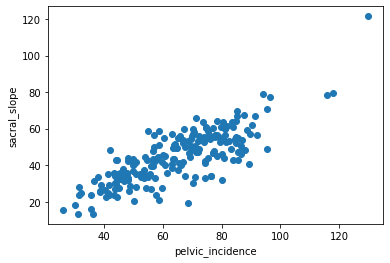

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

df = pd.read_csv("C:/MachineLearning/column_2C_weka.csv")

df.tail() #son 5 satır
df.head() #ilk 5 satır

abnormaldata1 = df[df['class'] =='Abnormal'] #dataframe'deki sadece abnormal olanı seç.
x = np.array(abnormaldata1.loc[:,"pelvic_incidence"]).reshape(-1,1) #pelvic_incidence içeren Numpy dizileri oluşturur.
y = np.array(abnormaldata1.loc[:,"sacral_slope"]).reshape(-1,1)

#görselleştirme
plt.scatter(x,y)
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.show()



0.427619799498007
0.4607746393295514


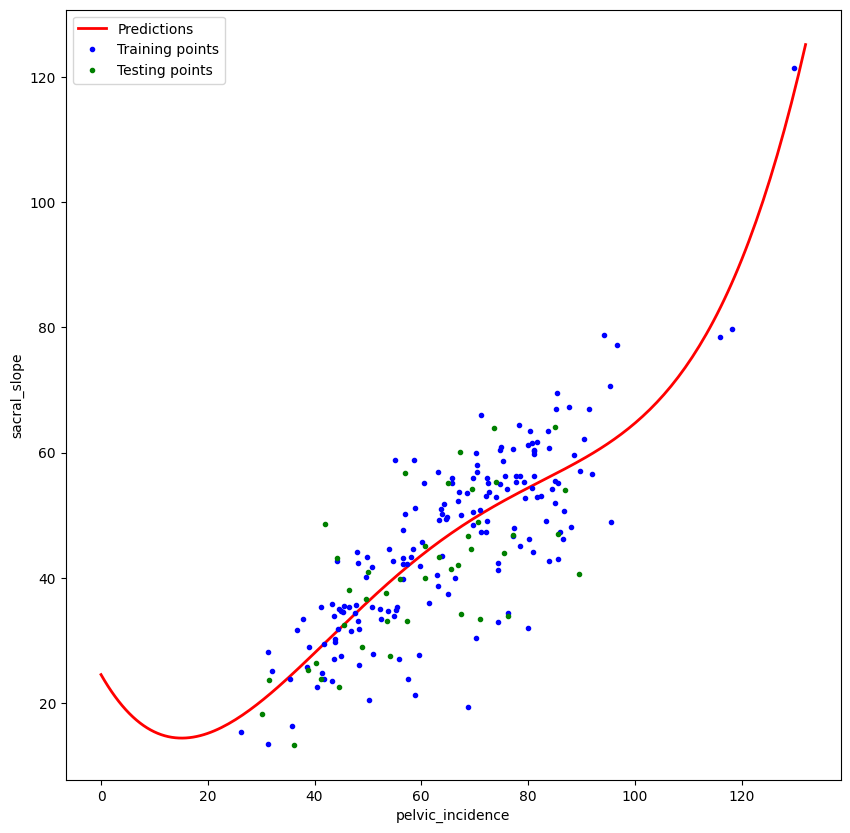

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) 
#random_steate2 => her zaman aynı test verileri oluştur.

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)  #tahminde bulunulur.
print(r2_score(y_test, y_pred)) #tahmin ile gerçek değer arasında doğruluk hesaplanır.

poly = PolynomialFeatures(degree=4, include_bias=True) #4.dereceden polinom
x_train_trans = poly.fit_transform(x_train) #genişletilmiş test verileri.
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))


X_new = np.linspace(0, 132, 200).reshape(200, 1) #0-132 arasında 200 değer oluştur.

X_new_poly = poly.transform(X_new) #degree=4 ile oluşturulmuş polinom özelliklerine dönüştürür.
y_new = lr.predict(X_new_poly) #dönüştürülen veriler y_new dizisine tahmin edilir.

#grafik
plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()
